In [1]:
import sys
sys.dont_write_bytecode = True

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas

import matplotlib.pyplot as plt


# Local imports.
from resale_flat_prices.resale_flat_data.resale_flat_data import ResaleFlatData
from resale_flat_prices.resale_flat_data.rent_prices_data import RentPricesData
from resale_flat_prices.h3_utils.h3_statistics import monthly_median_price
from resale_flat_prices.vis_utils.vis_utils import plot_df


# Data directories.
csv_data_dir = Path("../data/ResaleFlatPrices/")
processed_data_dir = Path("../data/processed_data/")

In [2]:
# Load processed and geocoded resale flat data.
resale_flat_data_csv_file = "resale-flat-prices.csv.zip"

# H3 cell creation using a specified resolution.
RESOLUTION = 9

# Calculate the median prices.
datetime_column = "year_quarter"
wanted_datetimes = [
    # "2024-Q4", "2024-Q3", 
    # "2024-Q2", "2024-Q1"
]
price_column = "price_per_sqft"

# Display columns.
disp_columns = [
    "year_month", "town", "block", "street_name", "flat_type", "storey_range", "floor_area_sqm", "age",
    "resale_price", "price_per_sqft", "h3"
]

resale_flat_data = ResaleFlatData(processed_data_dir / resale_flat_data_csv_file)
resale_flat_data.read_csv()
resale_flat_data.df = resale_flat_data.df.sort_values(["year_month", "town"])

# Create additional datetime columns indicating the quarter the resale occured in.
resale_flat_data.df["quarter"] = resale_flat_data.df["month"].apply(lambda x: int(np.ceil(x / 3)))
resale_flat_data.df["year_quarter"] = resale_flat_data.df.apply(lambda DF: str(DF["year"]) + "-Q" + str(DF["quarter"]), axis = 1)

# Restrict the resale dateetimes to prevent processing of unneeded data.
if len(wanted_datetimes) > 0:
    resale_flat_data.df = resale_flat_data.df[resale_flat_data.df[datetime_column].isin(wanted_datetimes)]

print("Resale flat data DataFrame: {}.".format(resale_flat_data.df.shape))

Resale flat data DataFrame: (941344, 25).


In [34]:
df = resale_flat_data.df.copy()

#df = df[df["street_name_cleaned"] == "ANG MO KIO AVENUE 1"]
df = df[df['address'] == '16 TOH YI DRIVE']

In [35]:
disp_cols = ['year', 'month', "year_quarter", 'address', 'storey_range', 'flat_type', 'age', 'price_per_sqft']

xdf = df[disp_cols].sort_values(["year", "month", "price_per_sqft"], ascending = False)

xdf = xdf[["year_quarter", "price_per_sqft"]].groupby("year_quarter").median().reset_index()

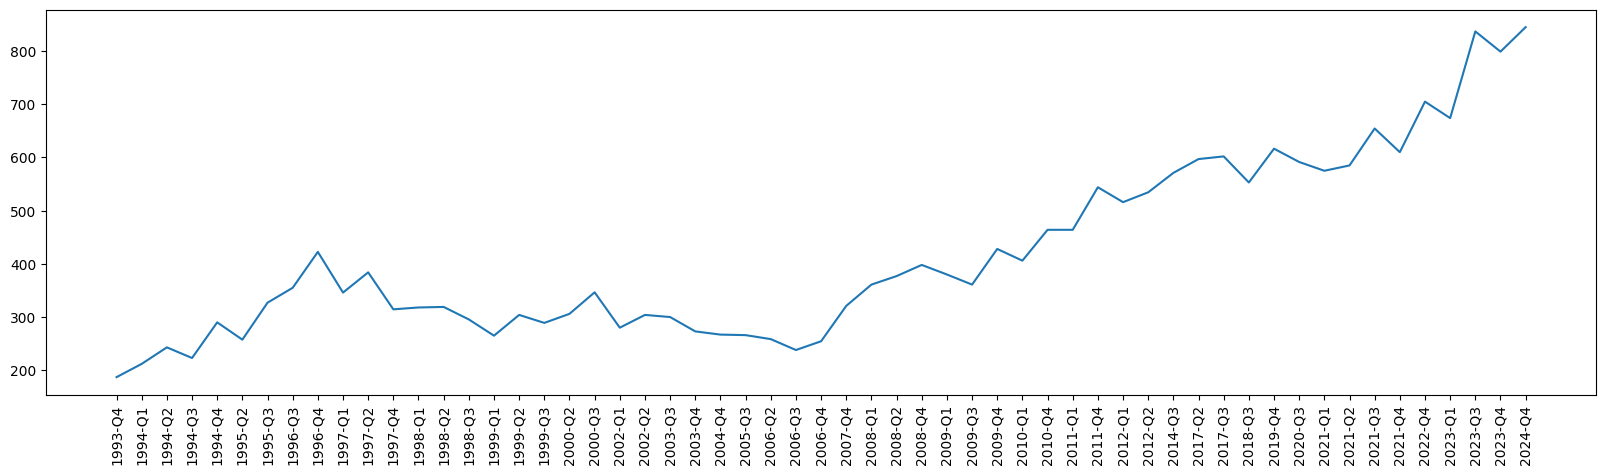

In [36]:
plt.figure(figsize = [20, 5])
plt.plot(xdf["year_quarter"], xdf["price_per_sqft"])
plt.xticks(rotation = 90)
plt.show()